<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [154]:
!pip install wget

In [155]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-08-10 00:06:16--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  44.1MB/s    in 0.8s    

2024-08-10 00:06:18 (44.1 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [156]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Demo: How to run an sql query


In [158]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [159]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [160]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
df_agecount = pd.read_sql_query(QUERY,conn)
df_agecount

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [161]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])


CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [162]:
QUERY = """
SELECT ConvertedComp
FROM master
"""
df_ConCom = pd.read_sql_query(QUERY,conn)
df_ConCom.isnull().value_counts()

ConvertedComp
False            10582
True               816
dtype: int64

In [163]:
df_ConCom

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0
...,...
11393,130000.0
11394,19880.0
11395,105000.0
11396,80371.0


In [164]:
df_ConCom['ConvertedComp'].mean()

131596.7316197316

In [165]:
df_ConCom['ConvertedComp'] = df_ConCom['ConvertedComp'].replace(np.NaN, df_ConCom['ConvertedComp'].mean())

In [166]:
df_ConCom.isnull().value_counts()

ConvertedComp
False            11398
dtype: int64

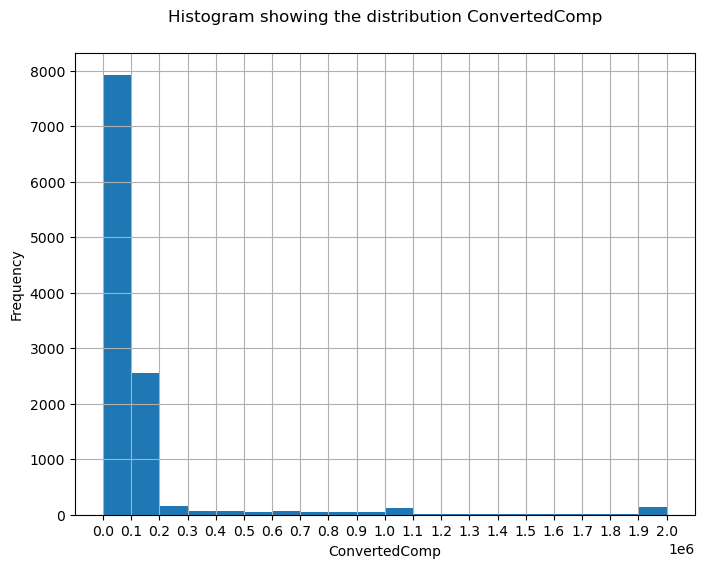

In [167]:
#custom_bin_edges = np.arange(16, 105, 7)
count, bin_edges = np.histogram(df_ConCom['ConvertedComp'], bins=20)      #, bins=custom_bin_edges

# un-stacked histogram
df_ConCom['ConvertedComp'].plot(kind ='hist', 
                                      figsize=(8, 6),
                                      bins=bin_edges,
                                      #alpha=0.6,
                                      xticks=bin_edges
                               )

plt.title('Histogram showing the distribution ConvertedComp', y = 1.05)
#plt.ylabel('Number of Years')
plt.xlabel('ConvertedComp')
plt.grid(True)

plt.show()

### Box Plots


Plot a box plot of `Age.`


In [168]:
# your code goes here
df_agecount

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


In [169]:
df_agecount

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


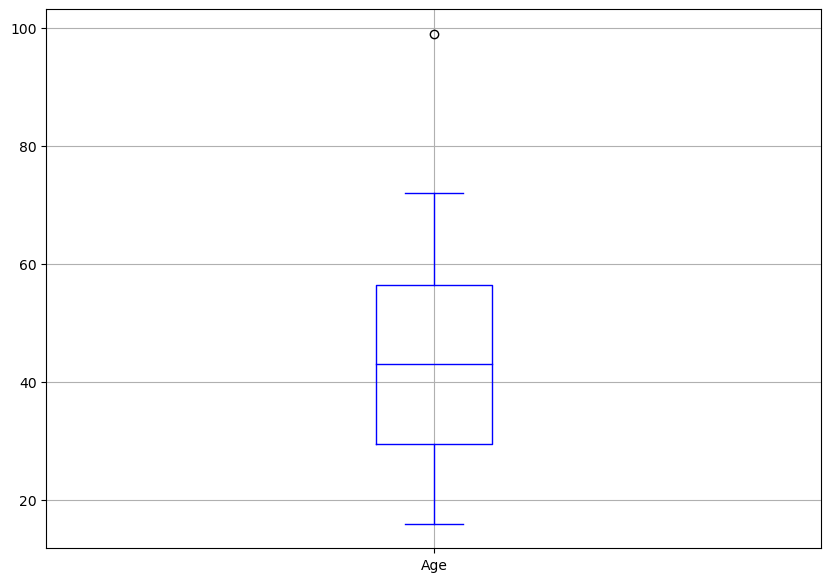

In [170]:
df_agecount['Age'].plot(kind ='box', figsize=(10, 7), color='blue' )
plt.grid(True)

In [171]:
df_agecount.describe()

,Age,count
count,55.000000,56.000000
mean,43.727273,203.535714
std,17.636719,248.771671
min,16.000000,1.000000
25%,29.500000,11.000000
50%,43.000000,73.000000
75%,56.500000,329.250000
max,99.000000,787.000000


In [172]:
# there are NANs in the age column. Replace and plot excercise has been done on the previous lab. Yopu can do it again if you like 

In [173]:
QUERY = """
SELECT Age
FROM master
"""
df_age = pd.read_sql_query(QUERY,conn)
df_age

,Age
0,22.0
1,23.0
2,28.0
3,26.0
4,29.0
...,...
11393,36.0
11394,25.0
11395,34.0
11396,25.0


In [174]:
df_age.isnull().value_counts()

Age  
False    11111
True       287
dtype: int64

In [175]:
df_age.mean()   # appx mean to 31 as age cannot be in fractions.

Age    30.779318
dtype: float64

In [176]:
df_age = df_age.replace(np.NaN, 31)
df_age.isnull().value_counts()

Age  
False    11398
dtype: int64

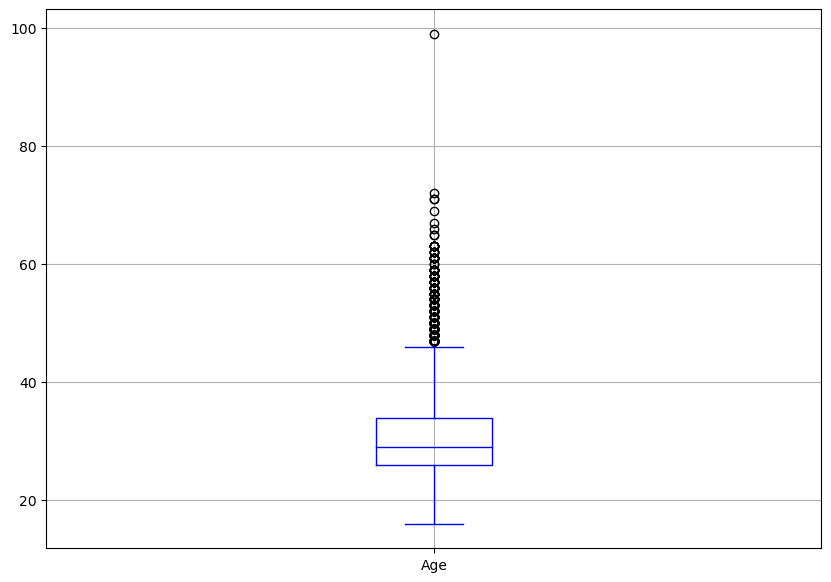

In [177]:
df_age.plot(kind ='box', figsize=(10, 7), color='blue' )
plt.grid(True)

In [178]:
df_age.describe()

,Age
count,11398.000000
mean,30.784875
std,7.300074
min,16.000000
25%,26.000000
50%,29.000000
75%,34.000000
max,99.000000


In [179]:
df_age.median()

Age    29.0
dtype: float64

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [180]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df_age_workwk = pd.read_sql_query(QUERY,conn)
df_age_workwk

,Age,WorkWeekHrs
0,22.0,80.0
1,23.0,32.0
2,28.0,40.0
3,26.0,40.0
4,29.0,45.0
...,...,...
11393,36.0,40.0
11394,25.0,40.0
11395,34.0,40.0
11396,25.0,42.5


In [181]:
df_age_workwk.corr()

,Age,WorkWeekHrs
Age,1.000000,0.036517
WorkWeekHrs,0.036517,1.000000


In [182]:
df_age_workwk['WorkWeekHrs'].isnull().value_counts()

False    11276
True       122
Name: WorkWeekHrs, dtype: int64

In [183]:
df_age_workwk['WorkWeekHrs'].value_counts()

40.0     5585
45.0     1120
50.0      732
35.0      587
42.0      309
         ... 
66.0        1
64.0        1
41.2        1
355.0       1
61.0        1
Name: WorkWeekHrs, Length: 113, dtype: int64

In [184]:
df_age_workwk['WorkWeekHrs'].mean()

42.064606243348706

In [185]:
df_age_workwk['WorkWeekHrs'] = df_age_workwk['WorkWeekHrs'].replace(np.NaN, 42)
df_age_workwk['WorkWeekHrs'].isnull().value_counts()

False    11398
Name: WorkWeekHrs, dtype: int64

In [186]:
df_age_workwk['WorkWeekHrs'].mean()

42.063914721881034

Text(0.5, 1.0, 'Relationship of Age and WorkWeekHrs')

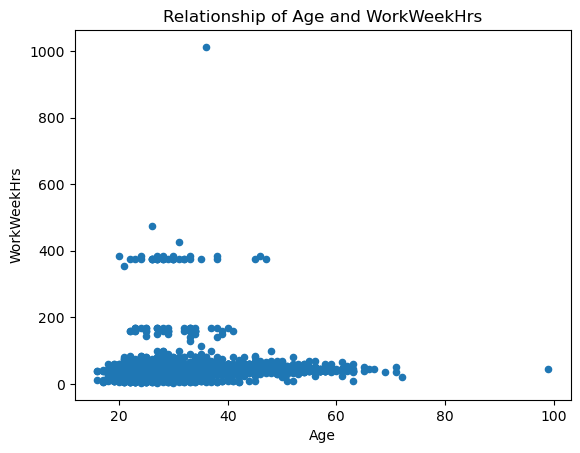

In [187]:
df_age_workwk.plot(kind = 'scatter', x = 'Age', y ='WorkWeekHrs' )
plt.title('Relationship of Age and WorkWeekHrs')

In [188]:
df_age_workwk['WorkWeekHrs'].describe()

count    11398.000000
mean        42.063915
std         24.540331
min          3.000000
25%         40.000000
50%         40.000000
75%         42.500000
max       1012.000000
Name: WorkWeekHrs, dtype: float64

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [189]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
df_bubble = pd.read_sql_query(QUERY,conn)
df_bubble


,Age,WorkWeekHrs,CodeRevHrs
0,22.0,80.0,NaN
1,23.0,32.0,12.0
2,28.0,40.0,5.0
3,26.0,40.0,NaN
4,29.0,45.0,5.0
...,...,...,...
11393,36.0,40.0,NaN
11394,25.0,40.0,5.0
11395,34.0,40.0,5.0
11396,25.0,42.5,2.0


In [190]:
df_bubble.CodeRevHrs.isnull().value_counts()

False    8972
True     2426
Name: CodeRevHrs, dtype: int64

In [191]:
df_bubble.CodeRevHrs.mean()

4.781071110120374

In [192]:
df_bubble.CodeRevHrs.value_counts()

2.00     1768
5.00     1657
4.00     1187
3.00     1117
1.00      989
10.00     660
8.00      522
6.00      379
15.00     152
7.00      107
20.00      83
12.00      72
0.50       46
0.00       38
1.50       24
25.00      20
2.50       19
16.00      19
9.00       16
30.00      13
14.00      12
40.00      11
50.00       6
0.10        6
0.25        5
7.50        5
18.00       4
17.00       3
35.00       3
0.01        3
13.00       3
99.00       2
0.20        2
0.05        2
21.00       2
60.00       1
28.00       1
54.00       1
90.00       1
11.00       1
6.50        1
45.00       1
0.40        1
24.00       1
0.30        1
36.00       1
22.00       1
7.19        1
48.00       1
52.00       1
Name: CodeRevHrs, dtype: int64

In [193]:
df_bubble['CodeRevHrs'] = df_bubble['CodeRevHrs'].replace(np.NaN, 2)
df_bubble['CodeRevHrs'].isnull().value_counts()

False    11398
Name: CodeRevHrs, dtype: int64

In [194]:
df_bubble.CodeRevHrs.value_counts()

2.00     4194
5.00     1657
4.00     1187
3.00     1117
1.00      989
10.00     660
8.00      522
6.00      379
15.00     152
7.00      107
20.00      83
12.00      72
0.50       46
0.00       38
1.50       24
25.00      20
2.50       19
16.00      19
9.00       16
30.00      13
14.00      12
40.00      11
50.00       6
0.10        6
0.25        5
7.50        5
18.00       4
17.00       3
35.00       3
0.01        3
13.00       3
99.00       2
0.20        2
0.05        2
21.00       2
60.00       1
28.00       1
54.00       1
90.00       1
11.00       1
6.50        1
45.00       1
0.40        1
24.00       1
0.30        1
36.00       1
22.00       1
7.19        1
48.00       1
52.00       1
Name: CodeRevHrs, dtype: int64

Text(0.5, 1.0, 'Relationship of CodeRevHrs and WorkWeekHrs')

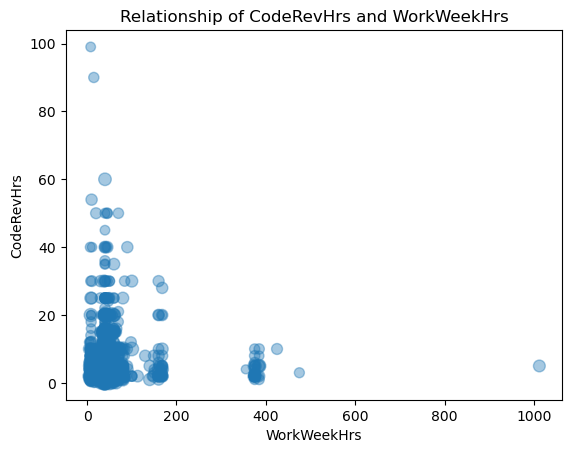

In [195]:
df_bubble.plot(kind = 'scatter', x ='WorkWeekHrs' , y ='CodeRevHrs', s = df_bubble['Age']*2, alpha = 0.4)
plt.title('Relationship of CodeRevHrs and WorkWeekHrs')

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [196]:
# your code goes here
table_name = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

#DatabaseDesireNextYear

CREATE TABLE "DatabaseDesireNextYear" (
"Respondent" INTEGER,
  "DatabaseDesireNextYear" TEXT
)


In [197]:
QUERY = """
SELECT DatabaseDesireNextYear, count(*) FROM DatabaseDesireNextYear group by DatabaseDesireNextYear order by count(*) desc
"""
# group by DatabaseDesireNextYear
practice = pd.read_sql_query(QUERY,conn)
#DatabaseDesireNextYear
practice

,DatabaseDesireNextYear,count(*)
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856
5,Microsoft SQL Server,2706
6,SQLite,2437
7,Firebase,1650
8,MariaDB,1385
9,DynamoDB,1044


In [198]:
QUERY = """
SELECT * FROM DatabaseDesireNextYear
"""

df_database = pd.read_sql_query(QUERY,conn)
#DatabaseDesireNextYear
df_database

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite
...,...,...
29570,25141,Elasticsearch
29571,25141,MongoDB
29572,25141,Microsoft SQL Server
29573,25141,Redis


In [199]:
df_database_count = df_database['DatabaseDesireNextYear'].value_counts()
df_database_count = df_database_count.to_frame()
df_database_count = df_database_count.head()
df_database_count = df_database_count.reset_index()
df_database_count

,index,DatabaseDesireNextYear
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


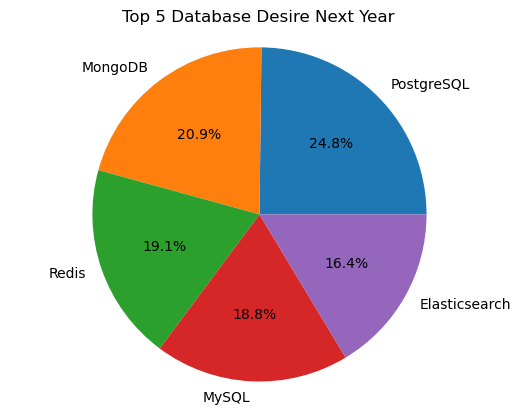

In [200]:
plt.pie(df_database_count['DatabaseDesireNextYear'], labels= df_database_count['index'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 5 Database Desire Next Year')
plt.show()

In [206]:
QUERY = """
SELECT LanguageDesireNextYear, count(*) as Count FROM LanguageDesireNextYear group by LanguageDesireNextYear order by Count
"""

df_lang = pd.read_sql_query(QUERY,conn)
df_lang


,LanguageDesireNextYear,Count
0,VBA,149
1,Erlang,310
2,Objective-C,310
3,Assembly,336
4,Clojure,413
5,Dart,610
6,Elixir,620
7,F#,621
8,Other(s):,836
9,R,850


In [208]:
QUERY = """
SELECT * FROM LanguageWorkedWith
"""
#SELECT LanguageWorkedWith, count(*) as Count FROM LanguageWorkedWith group by LanguageWorkedWith order by Count
df_langww = pd.read_sql_query(QUERY,conn)
df_langww

#LanguageWorkedWith

,Respondent,LanguageWorkedWith
0,4,C
1,4,C++
2,4,C#
3,4,Python
4,4,SQL
...,...,...
59787,25142,Go
59788,25142,HTML/CSS
59789,25142,PHP
59790,25142,Python


In [211]:
QUERY = """
SELECT LanguageWorkedWith, count(*) as Count FROM LanguageWorkedWith group by LanguageWorkedWith order by Count desc
"""
df_langww = pd.read_sql_query(QUERY,conn)
df_langww

#LanguageWorkedWith

,LanguageWorkedWith,Count
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542
5,Java,4506
6,C#,4288
7,TypeScript,3232
8,PHP,2913
9,C++,1946


In [235]:
QUERY = """
SELECT * FROM DatabaseWorkedWith
"""
df_DBww = pd.read_sql_query(QUERY,conn)
df_DBww.tail(50) #['DatabaseWorkedWith'].value_counts()

#DatabaseWorkedWith

,Respondent,DatabaseWorkedWith
31325,25109,MongoDB
31326,25109,MySQL
31327,25109,SQLite
31328,25110,DynamoDB
31329,25110,Elasticsearch
31330,25110,MariaDB
31331,25110,MongoDB
31332,25110,MySQL
31333,25110,PostgreSQL
31334,25110,Redis


In [251]:
df_stuff = df_DBww.groupby('Respondent')[['DatabaseWorkedWith']].sum()
df_stuff = df_stuff.reset_index()

In [252]:
df_stuff.head(50)

,Respondent,DatabaseWorkedWith
0,4,MySQLSQLite
1,9,DynamoDBPostgreSQLSQLite
2,13,CouchbaseDynamoDBFirebaseMySQL
3,16,MongoDBMicrosoft SQL ServerMySQL
4,17,MongoDBPostgreSQL
5,19,DynamoDBFirebaseMicrosoft SQL ServerMySQLSQLite
6,20,ElasticsearchMariaDBMongoDBMicrosoft SQL Server
7,22,ElasticsearchMySQLOracleRedis
8,23,OracleSQLite
9,24,FirebaseMongoDBMySQL


In [254]:
df_stuff[df_stuff['DatabaseWorkedWith'] == 'MySQL' ]

,Respondent,DatabaseWorkedWith
10,25,MySQL
61,129,MySQL
67,147,MySQL
68,148,MySQL
88,194,MySQL
...,...,...
10884,25007,MySQL
10888,25012,MySQL
10919,25091,MySQL
10929,25111,MySQL


In [226]:
QUERY = """
SELECT *  FROM master
"""
df_stuff = pd.read_sql_query(QUERY,conn)
df_stuff.columns

#DatabaseWorkedWith

Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [49]:
# your code goes here
df_ConCom


,ConvertedComp
0,61000.00000
1,95179.00000
2,90000.00000
3,455352.00000
4,65277.00000
...,...
11393,130000.00000
11394,19880.00000
11395,105000.00000
11396,80371.00000


In [50]:
df_age

,Age
0,22.0
1,23.0
2,28.0
3,26.0
4,29.0
...,...
11393,36.0
11394,25.0
11395,34.0
11396,25.0


In [51]:
df_age_concom = pd.concat( [df_age, df_ConCom], axis = 1)

In [52]:
df_age_concom

,Age,ConvertedComp
0,22.0,61000.00000
1,23.0,95179.00000
2,28.0,90000.00000
3,26.0,455352.00000
4,29.0,65277.00000
...,...,...
11393,36.0,130000.00000
11394,25.0,19880.00000
11395,34.0,105000.00000
11396,25.0,80371.00000


In [72]:
df_4560 = df_age_concom[df_age_concom['Age'].between(45,60)]
df_4560

,Age,ConvertedComp
7,47.0,103000.00000
50,54.0,131596.73162
66,47.0,54996.00000
75,47.0,62807.00000
93,45.0,72522.00000
...,...,...
11342,45.0,76339.00000
11345,46.0,68705.00000
11350,48.0,300000.00000
11372,50.0,87668.00000


In [77]:
df_4560 = df_4560.groupby(by='Age')['ConvertedComp'].median()
df_4560

Age
45.0     94210.00000
46.0    103500.00000
47.0     93746.00000
48.0    108250.00000
49.0     89520.00000
50.0     95000.00000
51.0    108423.00000
52.0    106044.00000
53.0    107754.50000
54.0    122000.00000
55.0    120000.00000
56.0    116030.50000
57.0    131596.73162
58.0    108000.00000
59.0    120000.00000
60.0    132287.50000
Name: ConvertedComp, dtype: float64

<AxesSubplot:xlabel='Age'>

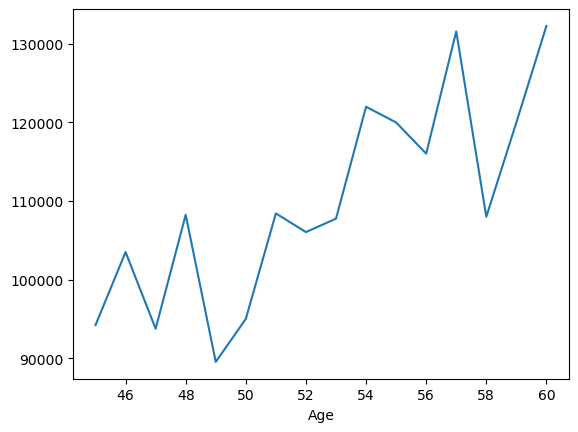

In [78]:
df_4560.plot()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [99]:
QUERY = """
SELECT MainBranch, count(*)
FROM master group by MainBranch
"""
test = pd.read_sql_query(QUERY,conn)
test

,MainBranch,count(*)
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


In [133]:
## your code goes here
QUERY = """
SELECT MainBranch
FROM master
"""
df_main = pd.read_sql_query(QUERY,conn)
df_main_frame = df_main.value_counts().to_frame()
df_main_frame

,0
MainBranch,
I am a developer by profession,10618
"I am not primarily a developer, but I write code sometimes as part of my work",780


In [134]:
df_main_frame = df_main_frame.reset_index()


,MainBranch,0
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


In [142]:
df_main_frame = df_main_frame.rename(columns = { 0: 'Count'})
df_main_frame

,MainBranch,Count
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


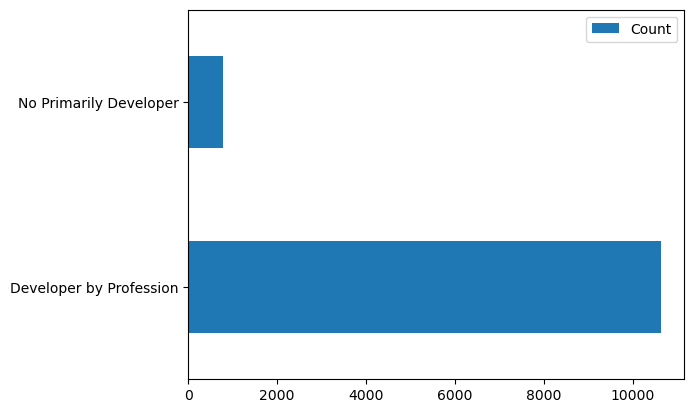

In [151]:
df_main_frame.plot(kind = 'barh')
plt.yticks(ticks=[0, 1], labels=['Developer by Profession', 'No Primarily Developer'])
#plt.grid(True)
plt.show()

Close the database connection.


In [152]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
